In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 
from scipy import stats

# Data Description

From [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/home)

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [2]:
raw_df = pd.read_csv('creditcard.csv')

# Fyi, variables provided are the result of a PCA transformation
# this is a classification problem 
# will test Naive Bayes, KNN Classifier, SVM Classifier, RandomForest, GradientBoost, Logistic Regression 

# Quick view of data
- check how data is loaded with head( ) method
- check central tendencies with describe( ) 
- check for missing values with isnull( ).sum( )
- check if we have any normally distributed variables with stats.normaltest( )
- check balance of dataset

In [3]:
#view loaded df

raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#describe data

raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#check for missing values

raw_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
ccard_df = raw_df.copy()

In [7]:
# See if we have any normally distributed variables 

pval_df = []
for x in ccard_df.columns:
    stat, pval = stats.normaltest(ccard_df[x])
    pval_df.append([stat,pval])
    
pd.DataFrame(pval_df,index=ccard_df.columns,
             columns=['stat','pval'])

,stat,pval
Time,936453.400109,0.000000e+00
V1,222086.395442,0.000000e+00
V2,297509.669059,0.000000e+00
V3,172313.138289,0.000000e+00
V4,35667.452068,0.000000e+00
V5,229535.698878,0.000000e+00
V6,165478.971036,0.000000e+00
V7,246965.098722,0.000000e+00
V8,419784.512978,0.000000e+00
V9,37276.402632,0.000000e+00


In [8]:
# See if we have any normally distributed variables in fraud_df 
fraud_df = ccard_df[ccard_df.Class==1]
not_fraud_df = ccard_df[ccard_df.Class==0]
pval_df = []
for x in fraud_df.columns:
    stat, pval = stats.normaltest(ccard_df[x])
    pval_df.append([stat,pval])
    
pd.DataFrame(pval_df,index=ccard_df.columns,
             columns=['stat','pval'])

,stat,pval
Time,936453.400109,0.000000e+00
V1,222086.395442,0.000000e+00
V2,297509.669059,0.000000e+00
V3,172313.138289,0.000000e+00
V4,35667.452068,0.000000e+00
V5,229535.698878,0.000000e+00
V6,165478.971036,0.000000e+00
V7,246965.098722,0.000000e+00
V8,419784.512978,0.000000e+00
V9,37276.402632,0.000000e+00


In [9]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
not_fraud_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

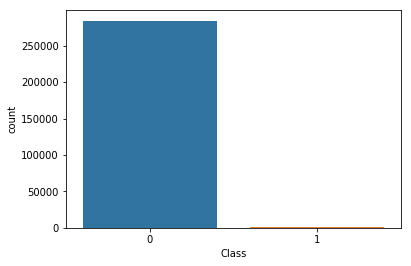

fraud count is 492
not_fraud count is 284315


In [11]:
# check for imbalance data

fraud = ccard_df.Class.sum()
not_fraud = len(ccard_df.Class)-fraud

sns.countplot(ccard_df.Class)
plt.show()

print('fraud count is {}'.format(fraud))
print('not_fraud count is {}'.format(not_fraud))

# Feature Engineering 

In [12]:
# Perform filter method to see which variables truly effect target variable 

col = ccard_df.drop('Class',1)
test = []

for column in col.columns: 
    a = ccard_df.loc[ccard_df.Class == 0, column]
    b = ccard_df.loc[ccard_df.Class == 1, column]
    tval, pval = stats.ttest_ind(b, a,equal_var=True)
    test.append([tval, pval])

filt = pd.DataFrame(test, index=col.columns, columns=['test','pval'])
filt.sort_values(by=['pval'],inplace=True,ascending=True)
filt

,test,pval
V14,-169.397603,0.000000e+00
V17,-184.334393,0.000000e+00
V16,-106.973592,0.000000e+00
V12,-144.047986,0.000000e+00
V11,83.662148,0.000000e+00
V10,-118.566353,0.000000e+00
V18,-59.869697,0.000000e+00
V9,-52.408017,0.000000e+00
V5,-50.915203,0.000000e+00
V4,71.859809,0.000000e+00


In [13]:
# take top 15 variables for testing 
 
top_15_variables = list(filt.index[:15])

# Run models 
- balance dataset by introducing more fraud data
- test different models without transforming variables to check performance
- compare model performance 
- adjust/drop independent variables if need be

In [14]:
### up-sample fraud data to balance dataset 
ccard_df = raw_df.copy()

from sklearn.utils import resample

# create data frame with based on top 10 variables 
top_15_variables.append('Class')
ccard_df = ccard_df[top_15_variables]

# seperate fraud vs. non-fraud into two dataframes
majority_df = ccard_df[ccard_df.Class==0].copy()
minority_df = ccard_df[ccard_df.Class==1].copy()

minority_df_upsampled = resample(minority_df, 
                                 replace=True,        # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=42)
upsampled_df = pd.concat([majority_df, minority_df_upsampled])

upsampled_df.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [15]:
upsampled_df.head()

,V14,V17,V16,V12,V11,V10,V18,V9,V5,V4,V3,V2,V1,V7,V6,Class
0,-0.311169,0.207971,-0.470401,-0.617801,-0.551600,0.090794,0.025791,0.363787,-0.338321,1.378155,2.536347,-0.072781,-1.359807,0.239599,0.462388,0
1,-0.143772,-0.114805,0.463917,1.065235,1.612727,-0.166974,-0.183361,-0.255425,0.060018,0.448154,0.166480,0.266151,1.191857,-0.078803,-0.082361,0
2,-0.165946,1.109969,-2.890083,0.066084,0.624501,0.207643,-0.121359,-1.514654,-0.503198,0.379780,1.773209,-1.340163,-1.358354,0.791461,1.800499,0
3,-0.287924,-0.684093,-1.059647,0.178228,-0.226487,-0.054952,1.965775,-1.387024,-0.010309,-0.863291,1.792993,-0.185226,-0.966272,0.237609,1.247203,0
4,-1.119670,-0.237033,-0.451449,0.538196,-0.822843,0.753074,-0.038195,0.817739,-0.407193,0.403034,1.548718,0.877737,-1.158233,0.592941,0.095921,0


In [16]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
data = upsampled_df.drop('Class',1)
target = upsampled_df['Class']


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import consensus_score

In [18]:
clf_1 = GaussianNB()
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_3 = RandomForestClassifier()
clf_4 = LogisticRegression()

### Naive Bayes 

In [19]:
clf_1.fit(X_train,y_train)
clf_1.score(X_train,y_train)

0.9202245775390964

In [20]:
clf_1.score(X_test,y_test)

0.9204840978854024

In [28]:
### test accuracy of Naive Bayes 
### using Confusion_matrix 

y_pred_1 = clf_1.predict(X_test)
confusion_matrix(y_test,y_pred_1)

array([[92146,  1617],
       [13304, 80581]])

In [31]:
### test accuracy of Naive Bayes 
### using Cross_validation

from sklearn.model_selection import cross_val_score
cross_val_score(clf_1, X_test, y_test, cv=10)

array([0.92017478, 0.92188   , 0.92161356, 0.91787903, 0.9186251 ,
       0.92011298, 0.92021957, 0.91989981, 0.92208484, 0.9224579 ])

### KNN

In [21]:
clf_2.fit(X_train,y_train)
clf_2.score(X_train,y_train)

0.9996797748975017

In [22]:
clf_2.score(X_test,y_test)

0.9994884038199181

In [29]:
### test accuracy of KNN
### using Confusion_matrix 

y_pred_2 = clf_2.predict(X_test)
confusion_matrix(y_test,y_pred_2)

array([[93667,    96],
       [    0, 93885]])

In [32]:
### test accuracy of KNN 
### using Cross_validation

cross_val_score(clf_2, X_test, y_test, cv=10)

array([0.99936055, 0.99930726, 0.99904082, 0.99914735, 0.99893419,
       0.99882754, 0.99882754, 0.99898742, 0.99936048, 0.99866766])

### Random Forest

In [23]:
clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999921256122336

In [24]:
clf_3.score(X_test,y_test)

0.9999413796043656

In [33]:
### test accuracy of RF
### using Confusion_matrix 

y_pred_3 = clf_3.predict(X_test)
confusion_matrix(y_test,y_pred_3)

array([[93752,    11],
       [    0, 93885]])

In [34]:
### test accuracy of RF
### using Cross_validation

cross_val_score(clf_3, X_test, y_test, cv=10)

array([1.        , 0.99994671, 0.99984014, 0.99968026, 0.99973355,
       0.99994671, 0.99973353, 0.99994671, 1.        , 0.99989341])

### Logistic Regression

In [25]:
clf_4.fit(X_train,y_train)
clf_4.score(X_train,y_train)

0.9384117884834454

In [26]:
clf_4.score(X_test,y_test)

0.9381075204638472

In [35]:
### test accuracy of Logistic Regression 
### using Confusion_matrix 

y_pred_4 = clf_4.predict(X_test)
confusion_matrix(y_test,y_pred_4)

array([[91503,  2260],
       [ 9354, 84531]])

In [36]:
### test accuracy of Lasso Regression 
### using Cross_validation

cross_val_score(clf_4, X_test, y_test, cv=10)

array([0.93967814, 0.94085047, 0.94069061, 0.93615774, 0.94079403,
       0.9373268 , 0.93956512, 0.93833937, 0.9422831 , 0.94196333])

# Review 

Out of the four models, Randomforest performed the best. To ensure RandomForest is the best model to use, I will run on the imbalanced dataset to check the accuracy, confusion_matrix, and cross_val_score. If it performs well, we will look into reducing the amount of variables to reduce performance time. 

In [37]:
ccard_df.head()

,V14,V17,V16,V12,V11,V10,V18,V9,V5,V4,V3,V2,V1,V7,V6,Class
0,-0.311169,0.207971,-0.470401,-0.617801,-0.551600,0.090794,0.025791,0.363787,-0.338321,1.378155,2.536347,-0.072781,-1.359807,0.239599,0.462388,0
1,-0.143772,-0.114805,0.463917,1.065235,1.612727,-0.166974,-0.183361,-0.255425,0.060018,0.448154,0.166480,0.266151,1.191857,-0.078803,-0.082361,0
2,-0.165946,1.109969,-2.890083,0.066084,0.624501,0.207643,-0.121359,-1.514654,-0.503198,0.379780,1.773209,-1.340163,-1.358354,0.791461,1.800499,0
3,-0.287924,-0.684093,-1.059647,0.178228,-0.226487,-0.054952,1.965775,-1.387024,-0.010309,-0.863291,1.792993,-0.185226,-0.966272,0.237609,1.247203,0
4,-1.119670,-0.237033,-0.451449,0.538196,-0.822843,0.753074,-0.038195,0.817739,-0.407193,0.403034,1.548718,0.877737,-1.158233,0.592941,0.095921,0


In [38]:
X = ccard_df.drop('Class',1)
y = ccard_df['Class']

clf_3.score(X, y)

0.9999508439048198

In [39]:
### test accuracy of Logistic Regression 
### using Confusion_matrix 

y_pred = clf_3.predict(X)
confusion_matrix(y,y_pred)

array([[284301,     14],
       [     0,    492]])

In [40]:
cross_val_score(clf_3, X, y, cv=10)

array([0.99852538, 0.99891159, 0.99978933, 0.99940311, 0.999368  ,
       0.99905197, 0.9997191 , 0.99954354, 0.99950843, 0.99922753])

### RandomForest Review 

The model performed well. I will now see if I can reduce the amount of variables without sacrificing model accuracy, in order to increase performance time. In order to do this, we will use the wrapper method. 

In [46]:
import random

for i in range(0, 15):
    num_to_select = random.randint(2,15) 
    
    #randomly select variables
    variables = list(random.sample(top_15_variables,num_to_select))
    variables.append('Class')
    
    #create df of randomly selected variables and target variable 
    df = upsampled_df[variables].copy()
    
    #seperate variables for testing 
    XX = df.drop('Class',1)
    yy = df['Class']
    
    clf = RandomForestClassifier()
    
    #score/accuracy 
    clf.fit(XX,yy)
    score = clf.score(XX, yy)
    
    print('''The accuracy of the model with {} is {}'''.format(variables, score))

The accuracy of the model with ['V10', 'V2', 'V1', 'V14', 'Class'] is 0.9999982413871937
The accuracy of the model with ['V16', 'V10', 'V18', 'V11', 'V6', 'Class'] is 0.9999964827743876
The accuracy of the model with ['V17', 'V9', 'V1', 'V14', 'V10', 'Class', 'V18', 'V2', 'V6', 'V5', 'V7', 'V12', 'V4', 'Class'] is 0.9999947241615813
The accuracy of the model with ['V7', 'V11', 'Class', 'V6', 'V4', 'V12', 'V3', 'V14', 'V17', 'Class'] is 0.9999982413871937
The accuracy of the model with ['V17', 'V9', 'V14', 'Class', 'V10', 'V5', 'V2', 'V12', 'V1', 'V7', 'V18', 'V4', 'Class'] is 0.9999982413871937
The accuracy of the model with ['V3', 'V14', 'Class', 'V17', 'V11', 'V6', 'V9', 'V1', 'V12', 'V10', 'V2', 'V4', 'Class'] is 1.0
The accuracy of the model with ['V3', 'V12', 'V14', 'V10', 'V18', 'V4', 'V11', 'V17', 'Class'] is 0.9999982413871937
The accuracy of the model with ['V9', 'V10', 'Class'] is 0.9999876897103565
The accuracy of the model with ['V6', 'V11', 'V17', 'V7', 'V9', 'V18', 'V1', 

#### Iterate through different variables 

In [47]:
#test 1
variables = ['V16', 'V10', 'V18', 'V11', 'V6', 'V14']

data = upsampled_df[variables]
target = upsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999947504081558

In [48]:
#test 2
variables = ['V16', 'V18', 'V11', 'V14']

data = upsampled_df[variables]
target = upsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999947504081558

In [49]:
#test 3
variables = ['V16','V18', 'V14']

data = upsampled_df[variables]
target = upsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999973752040778

In [50]:
#test 4
variables = ['V16', 'V14']

data = upsampled_df[variables]
target = upsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999842512244673

### Final Test

In [51]:
# test 5
variables = ['V18', 'V14']

data = upsampled_df[variables]
target = upsampled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

clf_3.fit(X_train,y_train)
clf_3.score(X_train,y_train)

0.9999868760203894

In [52]:
clf_3.score(X_test,y_test)

0.9997282145293315

In [53]:
y_pred_3 = clf_3.predict(X_test)
confusion_matrix(y_test,y_pred_3)

array([[93712,    51],
       [    0, 93885]])

In [55]:
cross_val_score(clf_3, X_test, y_test, cv=10)

array([0.99968027, 0.99973356, 0.99930726, 0.99925393, 0.99930722,
       0.99984012, 0.99941377, 0.99962695, 0.99962695, 0.99957365])

In [57]:
X = ccard_df[variables]
y = ccard_df['Class']

clf_3.score(X,y)

0.999803375619279

In [58]:
y_pred = clf_3.predict(X)
confusion_matrix(y, y_pred)

array([[284259,     56],
       [     0,    492]])

In [59]:
cross_val_score(clf_3, X, y, cv=10)

array([0.99813918, 0.99901692, 0.999368  , 0.99894667, 0.99880622,
       0.99852528, 0.99950843, 0.99908708, 0.99894663, 0.99905197])

# Conclusion 

RandomForest is very accurate when predicting fraud. However, the model may be an overfit. To predict fraud accurately, you only need two variables [V14 and V18]. 